# Topic Labels

In [1]:
from collections import Counter
from itertools import combinations

from openpyxl import load_workbook


labels_file = '../../../../impact-of-fiction/data/topic_models/topic_words-speed_learn-min_df_0.01-max_df_0.5-labelled_Katja.xlsx'

wb = load_workbook(labels_file)
ws = wb.active

label_freq = Counter()
num_label_freq = Counter()
cooc = Counter()
cooc_size = Counter()
topic_size = Counter()
theme_size = Counter()


data = []
for ri, row in enumerate(ws):
    values = [cell.value for cell in row]
    if ri == 0:
        headers = values
        headers[3] = 'theme_label'
    else:
        row_json = {header: values[hi] for hi, header in enumerate(headers)}
        labels = row_json['theme_label'].strip().split('; ')
        row_json['theme_label'] = ';'.join(labels)
        label_freq.update(labels)
        num_label_freq.update([len(labels)])
        for label in labels:
            theme_size[label] += row_json['topic_size']
        cooc.update([(label1, label2) for label1, label2 in combinations(sorted(labels), 2)])
        for label1, label2 in combinations(sorted(labels), 2):
            cooc_size[(label1, label2)] += row_json['topic_size']
        topic_size[row_json['topic_num']] = row_json['topic_size']
        data.append(row_json)


In [2]:
topic_size.most_common(10)
theme_size.most_common(10)


[('geography and setting', 4317),
 ('behaviours/feelings', 3860),
 ('culture', 3524),
 ('history', 2020),
 ('crime', 1899),
 ('religion, spirituality and philosophy', 1797),
 ('other', 1756),
 ('economy and work', 1232),
 ('medicine/health', 1058),
 ('city, travel and transport', 1012)]

In [3]:

count = 0
for label, freq in label_freq.most_common():
    count += 1
    print(count, label, freq)


labels = [l for l, _ in label_freq.most_common()]
labels = [l for l in labels if l != 'other'] + ['other']
print(", ".join([f"{li+1}. " + r"{\em " + f"{l}" + "}" for li, l in enumerate(labels)]))

1 geography and setting 63
2 behaviours/feelings 43
3 culture 42
4 other 33
5 crime 28
6 history 26
7 religion, spirituality and philosophy 16
8 supernatural, fantasy and sci-fi 13
9 war 13
10 society 12
11 city, travel and transport 11
12 romance and sex 10
13 medicine/health 9
14 wildlife/nature 9
15 economy and work 8
16 lifestyle and sport 7
17 politics 7
18 family 5
19 science 5
1. {\em geography and setting}, 2. {\em behaviours/feelings}, 3. {\em culture}, 4. {\em crime}, 5. {\em history}, 6. {\em religion, spirituality and philosophy}, 7. {\em supernatural, fantasy and sci-fi}, 8. {\em war}, 9. {\em society}, 10. {\em city, travel and transport}, 11. {\em romance and sex}, 12. {\em medicine/health}, 13. {\em wildlife/nature}, 14. {\em economy and work}, 15. {\em lifestyle and sport}, 16. {\em politics}, 17. {\em family}, 18. {\em science}, 19. {\em other}


In [4]:
{l: l for l in label_freq.keys()}

{'city, travel and transport': 'city, travel and transport',
 'economy and work': 'economy and work',
 'behaviours/feelings': 'behaviours/feelings',
 'religion, spirituality and philosophy': 'religion, spirituality and philosophy',
 'supernatural, fantasy and sci-fi': 'supernatural, fantasy and sci-fi',
 'other': 'other',
 'crime': 'crime',
 'geography and setting': 'geography and setting',
 'history': 'history',
 'medicine/health': 'medicine/health',
 'family': 'family',
 'lifestyle and sport': 'lifestyle and sport',
 'culture': 'culture',
 'politics': 'politics',
 'war': 'war',
 'society': 'society',
 'romance and sex': 'romance and sex',
 'science': 'science',
 'wildlife/nature': 'wildlife/nature'}

In [5]:
label_map = {
    'city, travel and transport': 'city & travel',
    'economy and work': 'economy & work',
    'behaviours/feelings': 'behaviours / feelings',
    'religion, spirituality and philosophy': 'reli. / spirit. / phil.',
    'supernatural, fantasy and sci-fi': 'super., fantasy & sci-fi',
    'other': 'other',
    'crime': 'crime',
    'geography and setting': 'geography & setting',
    'history': 'history',
    'medicine/health': 'medicine / health',
    'family': 'family',
    'lifestyle and sport': 'lifestyle & sport',
    'culture': 'culture',
    'politics': 'politics',
    'war': 'war',
    'society': 'society',
    'romance and sex': 'romance & sex',
    'science': 'science',
    'wildlife/nature': 'wildlife / nature'
}

In [6]:
import pandas as pd

df = pd.DataFrame(data)
df['theme_label_short'] = df.theme_label.apply(lambda fl: ';'.join([label_map[fl] for fl in fl.split(';')]))
df[df.theme_label.str.contains(';')]



,topic_num,topic_size,topic_words,theme_label,Notes,theme_label_short
8,8,299,stockholm göteborg andersson malmö henrik zwee...,crime;geography and setting,"heeft iets met Zweden te maken, weet niet waar...",crime;geography & setting
11,11,233,perfectionistisch bewuster burn-out perfection...,behaviours/feelings;medicine/health;economy an...,None,behaviours / feelings;medicine / health;econom...
12,12,231,supergroot wiebellen pfff juf tsss ieuw joehoe...,behaviours/feelings;family,None,behaviours / feelings;family
13,13,216,voedingswaarde eiwit eiwitrijk ingrediënt plan...,medicine/health;lifestyle and sport,None,medicine / health;lifestyle & sport
20,20,179,jeneverfles amechtig potsierlijk overtoom twee...,geography and setting;behaviours/feelings,doet me aande Koningsdag denken of aan kroegen...,geography & setting;behaviours / feelings
...,...,...,...,...,...,...
216,216,26,belgravia pope lady eaton hertogin lord lakei ...,culture;geography and setting;history,a bit of everything: geography; history; books...,culture;geography & setting;history
218,218,25,macgregor caine serena blade gwendolyn hartenb...,behaviours/feelings;other,None,behaviours / feelings;other
219,219,24,suzanna calhoun smaragde towers livingston slo...,behaviours/feelings;geography and setting;other,None,behaviours / feelings;geography & setting;other
220,220,23,kerktijd meevallen mevvallen bromstem ria tege...,"behaviours/feelings;religion, spirituality and...",None,behaviours / feelings;reli. / spirit. / phil.


In [7]:
df

,topic_num,topic_size,topic_words,theme_label,Notes,theme_label_short
0,0,512,stoeptegel minutenlang fietssleutel snelbinder...,"city, travel and transport",None,city & travel
1,1,415,implementeren bedrijfscultuur managementteam m...,economy and work,None,economy & work
2,2,383,jemig gênant sorry jeetje irritant verpessen g...,behaviours/feelings,None,behaviours / feelings
3,3,320,thuisgekomen koopavond koffiedrinken ongezelli...,behaviours/feelings,None,behaviours / feelings
4,4,311,theologisch verkondiging theoloog godswege the...,"religion, spirituality and philosophy",None,reli. / spirit. / phil.
...,...,...,...,...,...,...
223,223,22,manege halster hoofdstel hinnikken pony’s voor...,wildlife/nature,hourseriding,wildlife / nature
224,224,21,chesapeake susie bree mick jess mack o’brien t...,other,?,other
225,225,20,maarten ad volkscultuur mieter sien rie balk v...,other,?,other
226,226,16,peeters dalí choco politiekantoor flik onderzo...,crime,Flemish,crime


In [ ]:
df.to_csv('../data/topic_labels-new_model.tsv', sep='\t', index=False)

In [9]:
df['theme_label_list'] = df.theme_label_short.str.split(';')
books_per_theme = df.explode('theme_label_list').groupby('theme_label_list').topic_size.sum()
books_per_theme = books_per_theme.rename('Number of books').to_frame().reset_index().rename(columns={'theme_label_list': 'Theme'})
books_per_theme
topics_per_theme = df.explode('theme_label_list').theme_label_list.value_counts()
topics_per_theme = topics_per_theme.rename('Number of topics').to_frame().reset_index().rename(columns={'index': 'Theme'})

per_theme = pd.merge(topics_per_theme, books_per_theme, on='Theme')
per_theme

,Theme,Number of topics,Number of books
0,geography & setting,63,4317
1,behaviours / feelings,43,3860
2,culture,42,3524
3,other,33,1756
4,crime,28,1899
5,history,26,2020
6,reli. / spirit. / phil.,16,1797
7,"super., fantasy & sci-fi",13,936
8,war,13,952
9,society,12,851


In [10]:
from collections import defaultdict


temp = (df
        .explode('theme_label_list')
        .groupby('theme_label_list')
        .topic_num.value_counts()
        .rename('has_theme')
        .reset_index()
        .to_dict())


temp.keys()
theme_topic_map = defaultdict(list)
for idx in temp['theme_label_list']:
    theme = temp['theme_label_list'][idx]
    theme_topic_map[theme].append(temp['topic_num'][idx])

print(theme_topic_map)

defaultdict(<class 'list'>, {'behaviours / feelings': [2, 3, 9, 11, 12, 18, 20, 28, 34, 45, 49, 67, 69, 77, 82, 84, 87, 88, 103, 113, 114, 116, 123, 129, 131, 138, 147, 161, 170, 178, 180, 181, 185, 191, 192, 200, 206, 211, 213, 218, 219, 220, 222], 'city & travel': [0, 85, 102, 106, 111, 149, 164, 169, 175, 179, 194], 'crime': [8, 19, 22, 44, 61, 62, 86, 101, 104, 112, 122, 126, 145, 153, 155, 156, 165, 166, 182, 188, 191, 194, 196, 201, 210, 214, 215, 226], 'culture': [14, 16, 22, 23, 25, 26, 31, 33, 34, 39, 43, 45, 57, 71, 73, 80, 81, 83, 88, 91, 92, 98, 99, 102, 109, 110, 115, 116, 129, 134, 138, 143, 146, 150, 152, 157, 184, 186, 187, 198, 200, 216], 'economy & work': [1, 11, 28, 36, 48, 84, 90, 112], 'family': [12, 25, 123, 181, 221], 'geography & setting': [8, 20, 23, 26, 31, 37, 38, 39, 42, 47, 50, 53, 57, 61, 64, 73, 80, 81, 92, 93, 95, 99, 100, 109, 110, 112, 115, 116, 127, 129, 131, 134, 138, 139, 140, 141, 142, 143, 144, 150, 152, 155, 157, 159, 163, 167, 169, 172, 173, 174

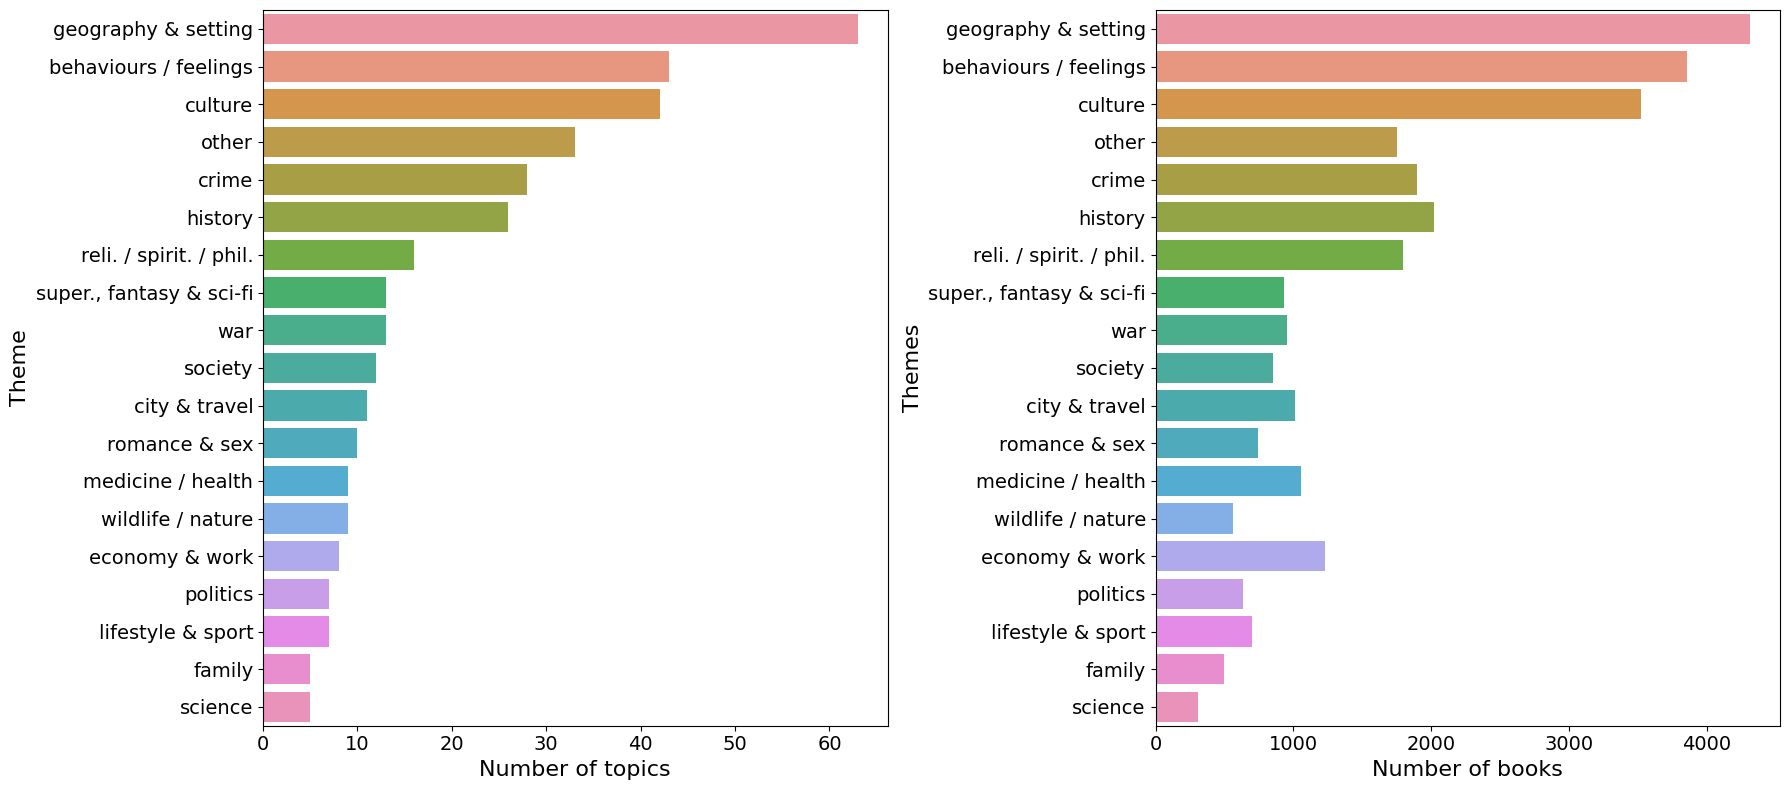

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 2)

sns.barplot(data=per_theme, x='Number of topics', y='Theme', ax=ax[0])
sns.barplot(data=per_theme, x='Number of books', y='Theme', ax=ax[1])
#topics_per_theme
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[0].set_xlabel('Number of topics', fontsize=16)
ax[1].set_xlabel('Number of books', fontsize=16)
ax[0].set_ylabel('Theme', fontsize=16)
ax[1].set_ylabel('Themes', fontsize=16)

fig.set_size_inches(18, 8)
fig.tight_layout()
fig.savefig('../images/genre_topic/theme_book_topic_dist.png', dpi=150)

In [12]:
sum(label_freq.values())
num_label_freq

Counter({1: 124, 2: 78, 3: 24, 4: 2})

In [13]:
for labels, freq in cooc.most_common():
    label1, label2 = labels
    intersection = freq
    union = label_freq[label1] + label_freq[label2] - freq
    iou = intersection / union
    print(f"{label1: <35}\t{label2: <35}\t{freq: >4}\t{label_freq[label1]: >4}\t{label_freq[label2]: >4}\t{iou: >6.2f}")

culture                            	geography and setting              	  24	  42	  63	  0.30
geography and setting              	history                            	  15	  63	  26	  0.20
behaviours/feelings                	geography and setting              	   9	  43	  63	  0.09
crime                              	geography and setting              	   8	  28	  63	  0.10
history                            	war                                	   8	  26	  13	  0.26
behaviours/feelings                	culture                            	   7	  43	  42	  0.09
culture                            	history                            	   5	  42	  26	  0.08
economy and work                   	society                            	   4	   8	  12	  0.25
geography and setting              	religion, spirituality and philosophy	   4	  63	  16	  0.05
behaviours/feelings                	other                              	   4	  43	  33	  0.06
behaviours/feelings                	economy and work      

In [14]:
cooc_data = []
for labels, freq in cooc_size.most_common():
    label1, label2 = labels
    intersection = freq
    union = theme_size[label1] + theme_size[label2] - freq
    iou = intersection / union
    share1 = freq / theme_size[label1]
    share2 = freq / theme_size[label2]
    
    print(f"{label1: <35}\t{label2: <35}\t{freq: >4}\t{theme_size[label1]: >4}\t{theme_size[label2]: >4}\t{share1: >6.2f}")
    cooc_data.append([label1, label2, freq, theme_size[label1], theme_size[label2], share1, share2])
    cooc_data.append([label2, label1, freq, theme_size[label2], theme_size[label1], share2, share1])
    

culture                            	geography and setting              	1713	3524	4317	  0.49
geography and setting              	history                            	1038	4317	2020	  0.24
history                            	war                                	 622	2020	 952	  0.31
crime                              	geography and setting              	 619	1899	4317	  0.33
behaviours/feelings                	geography and setting              	 514	3860	4317	  0.13
behaviours/feelings                	culture                            	 509	3860	3524	  0.13
behaviours/feelings                	economy and work                   	 446	3860	1232	  0.12
economy and work                   	society                            	 371	1232	 851	  0.30
behaviours/feelings                	family                             	 324	3860	 498	  0.08
economy and work                   	politics                           	 310	1232	 634	  0.25
politics                           	society                 

In [15]:
cooc_df = pd.DataFrame(data=cooc_data, columns=['Theme 1', 'Theme 2', 'Book overlap', 'Books theme 1', 'Books theme 2', 'Share 1', 'Share 2'])
cooc_df

,Theme 1,Theme 2,Book overlap,Books theme 1,Books theme 2,Share 1,Share 2
0,culture,geography and setting,1713,3524,4317,0.486095,0.396803
1,geography and setting,culture,1713,4317,3524,0.396803,0.486095
2,geography and setting,history,1038,4317,2020,0.240445,0.513861
3,history,geography and setting,1038,2020,4317,0.513861,0.240445
4,history,war,622,2020,952,0.307921,0.653361
...,...,...,...,...,...,...,...
113,science,history,30,308,2020,0.097403,0.014851
114,science,war,30,308,952,0.097403,0.031513
115,war,science,30,952,308,0.031513,0.097403
116,family,wildlife/nature,23,498,561,0.046185,0.040998


In [16]:
cooc_share = cooc_df.pivot(index='Theme 1', columns='Theme 2', values='Share 1').fillna(0.0)
cooc_share.style.format(precision=2).background_gradient(axis=None)

Theme 2,behaviours/feelings,"city, travel and transport",crime,culture,economy and work,family,geography and setting,history,lifestyle and sport,medicine/health,other,politics,"religion, spirituality and philosophy",romance and sex,science,society,"supernatural, fantasy and sci-fi",war,wildlife/nature
Theme 1,,,,,,,,,,,,,,,,,,,
behaviours/feelings,0.00,0.00,0.01,0.13,0.12,0.08,0.13,0.01,0.03,0.06,0.03,0.00,0.03,0.04,0.00,0.05,0.00,0.00,0.00
"city, travel and transport",0.00,0.00,0.03,0.06,0.00,0.00,0.04,0.00,0.00,0.00,0.10,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00
crime,0.02,0.02,0.00,0.09,0.03,0.00,0.33,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.03,0.00,0.00,0.00
culture,0.14,0.02,0.05,0.00,0.00,0.04,0.49,0.05,0.00,0.00,0.01,0.00,0.04,0.01,0.00,0.01,0.00,0.03,0.00
economy and work,0.36,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.19,0.00,0.25,0.00,0.00,0.00,0.30,0.00,0.00,0.00
family,0.65,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.05
geography and setting,0.12,0.01,0.14,0.40,0.01,0.00,0.00,0.24,0.00,0.00,0.01,0.01,0.06,0.01,0.00,0.04,0.00,0.05,0.02
history,0.02,0.00,0.00,0.09,0.00,0.00,0.51,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.31,0.00
lifestyle and sport,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
table = (cooc_df[cooc_df['Share 1'] > 0.25]
         .sort_values('Theme 1')[['Theme 1', 'Share 1', 'Theme 2', 'Share 2', 'Book overlap', 'Books theme 1', 'Books theme 2']]
         .set_index('Theme 1')
         .style.format(precision=2).to_latex())
print(table)

\begin{tabular}{lrlrrrr}
 & Share 1 & Theme 2 & Share 2 & Book overlap & Books theme 1 & Books theme 2 \\
Theme 1 &  &  &  &  &  &  \\
crime & 0.33 & geography and setting & 0.14 & 619 & 1899 & 4317 \\
culture & 0.49 & geography and setting & 0.40 & 1713 & 3524 & 4317 \\
economy and work & 0.36 & behaviours/feelings & 0.12 & 446 & 1232 & 3860 \\
economy and work & 0.30 & society & 0.44 & 371 & 1232 & 851 \\
economy and work & 0.25 & politics & 0.49 & 310 & 1232 & 634 \\
family & 0.65 & behaviours/feelings & 0.08 & 324 & 498 & 3860 \\
family & 0.30 & culture & 0.04 & 151 & 498 & 3524 \\
geography and setting & 0.40 & culture & 0.49 & 1713 & 4317 & 3524 \\
history & 0.51 & geography and setting & 0.24 & 1038 & 2020 & 4317 \\
history & 0.31 & war & 0.65 & 622 & 2020 & 952 \\
lifestyle and sport & 0.31 & medicine/health & 0.20 & 216 & 702 & 1058 \\
politics & 0.49 & economy and work & 0.25 & 310 & 634 & 1232 \\
politics & 0.49 & society & 0.36 & 310 & 634 & 851 \\
society & 0.44 & economy 

In [18]:
cooc_df[cooc_df['Theme 1'] == 'geography and setting']
cooc_df[cooc_df['Theme 1'] == 'behaviours/feelings']
#cooc_df[cooc_df['Theme 1'] == 'culture']


,Theme 1,Theme 2,Book overlap,Books theme 1,Books theme 2,Share 1,Share 2
8,behaviours/feelings,geography and setting,514,3860,4317,0.133161,0.119064
10,behaviours/feelings,culture,509,3860,3524,0.131865,0.144438
12,behaviours/feelings,economy and work,446,3860,1232,0.115544,0.362013
16,behaviours/feelings,family,324,3860,498,0.083938,0.650602
24,behaviours/feelings,medicine/health,233,3860,1058,0.060363,0.220227
32,behaviours/feelings,society,201,3860,851,0.052073,0.236193
38,behaviours/feelings,romance and sex,160,3860,744,0.041451,0.215054
46,behaviours/feelings,"religion, spirituality and philosophy",133,3860,1797,0.034456,0.074012
52,behaviours/feelings,other,109,3860,1756,0.028238,0.062073
54,behaviours/feelings,lifestyle and sport,106,3860,702,0.027461,0.150997


The themes with substantial overlap are:

- Crime (33%)  Geography & setting (14%)
- Culture (49%)  Geography & setting (40%)
- Economy and work (36%) Behaviours / feelings (12%)
- Family (65%) and behaviours / feelings (8%)
- Politics and Society
- 
- War (49%) and Politics (31%)


## Mapping ISBN to Topic, Topic Score and Themes

In [29]:
topic_themes = {row['topic_num']: ';'.join([label_map[tl] for tl in row['theme_label'].split(';')]) for row in data}
len(topic_themes)

228

In [30]:
import ast
import gzip
import os
from top2vec import Top2Vec

from numpy import dot
from numpy.linalg import norm


def compute_cosine_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

model_file = '../data/topic_models/t2v-content_models/t2v_model-speed_learn-book_lemmas-uncased-min_df_0.01-max_df_0.5-content.model'

model = Top2Vec.load(model_file)

model.document_vectors
nearest_topic_idx = model.document_vectors.argmax(axis=1)
max(nearest_topic_idx)

data = {
    'isbn': [],
    'topic': [],
    'score': [],
    'themes': []
}

for di, doc_top in enumerate(model.doc_top):
    doc_vec = model.document_vectors[di]
    top_vec = model.topic_vectors[doc_top]
    isbn = model.document_ids[di].split('_')[-1]    
    score = compute_cosine_sim(doc_vec, top_vec)
    data['isbn'].append(isbn)
    data['topic'].append(doc_top)
    data['score'].append(score)
    data['themes'].append(topic_themes[doc_top])



/Users/marijnkoolen/.local/share/virtualenvs/fuzzy-search-KYi4BGOl/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/marijnkoolen/.local/share/virtualenvs/fuzzy-search-KYi4BGOl/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users

In [32]:
isbn_topic_scores = pd.DataFrame(data)
isbn_topic_scores

,isbn,topic,score,themes
0,9789045020860,150,0.700171,geography & setting;culture
1,9789403127705,17,0.620962,reli. / spirit. / phil.
2,9789025440879,25,0.325808,culture;family
3,9789026152412,181,0.600034,behaviours / feelings;family
4,9789021572246,56,0.655904,medicine / health
...,...,...,...,...
19228,9789029731027,21,0.407154,lifestyle & sport
19229,9789021560229,15,0.399528,reli. / spirit. / phil.
19230,9789020411324,102,0.572321,culture;city & travel
19231,9789460415210,6,0.597047,other


In [33]:
isbn_topic_scores.to_csv('../data/isbn_topic_scores.tsv.gz', index=False, sep='\t', compression='gzip')

In [128]:
isbn_topic_scores['themes'] = isbn_topic_scores.themes.str.split(';')

In [134]:
isbn_topic_scores.explode('themes').set_index('topic').themes.value_counts()

geography & setting         4317
behaviours / feelings       3860
culture                     3524
history                     2020
crime                       1899
reli. / spirit. / phil.     1797
other                       1756
economy & work              1232
medicine / health           1058
travel & transport          1012
war                          952
super., fantasy & sci-fi     936
society                      851
romance & sex                744
lifestyle & sport            702
politics                     634
wildlife / nature            561
family                       498
science                      308
Name: themes, dtype: int64